In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
# get data 
df=pd.read_csv('E:\insideAIML\ML\FuelConsumption.csv')

In [28]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [29]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [30]:
# separaete iv and dv 

x= df[['ENGINESIZE']].values

y=df[['CO2EMISSIONS']].values

In [33]:
# import plynomial features  for increse data order 

from sklearn.preprocessing import PolynomialFeatures 

In [64]:
poly=PolynomialFeatures(degree=3)

In [65]:
trans_iv = poly.fit_transform(x)

In [66]:
trans_iv

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train , x_test , y_train , y_test = train_test_split(trans_iv , y , test_size=0.2 , random_state=95)

In [69]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(x_test , y_test)

LinearRegression()

In [74]:
y_predict=lr.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error 

In [77]:
mean_squared_error(y_predict , y_test)

1039.323985622966

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_predict , y_test)

0.6805669590956462

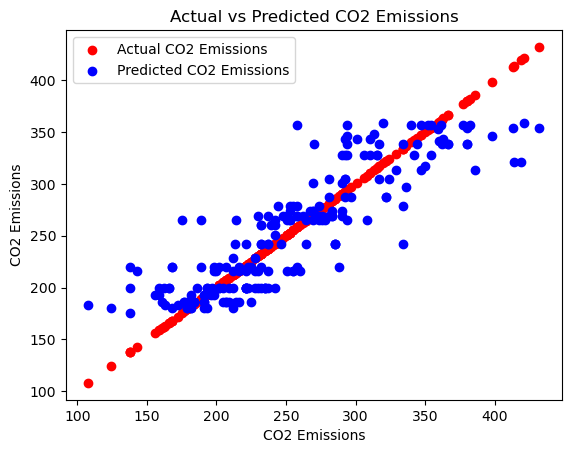

In [81]:
plt.scatter(y_test, y_test, c="r", label="Actual CO2 Emissions")
plt.scatter(y_test, y_predict, c="b", label="Predicted CO2 Emissions")
plt.xlabel('CO2 Emissions')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()